In [2]:
#https://www.tensorflow.org/tensorboard/dataframe_api

In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from utils import find_train_episode_rewards_dirs, load_event_data, retreive_data_df, retreive_data_np, average_and_confidence,plot_with_confidence_interval, plot_multiple_with_confidence_intervals, plot_multiple, replicate_structure_and_copy
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np



In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.15.1


In [3]:
src_root_directory = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/'
dst_root_directory = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/processed_results/'

replicate_structure_and_copy(src_root_directory, dst_root_directory)


Copied file: /Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/mujoco/Ant-v2/hatrpo/mlp/1/run2/logs/train_episode_rewards/aver_rewards/events.out.tfevents.1711738184.pearl0-MS-7B17 to /Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/processed_results/mujoco/Ant-v2/hatrpo/mlp/1/run2/logs/train_episode_rewards/aver_rewards/events.out.tfevents.1711738184.pearl0-MS-7B17
Copied file: /Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/mujoco/Ant-v2/hatrpo/mlp/4/run2/logs/train_episode_rewards/aver_rewards/events.out.tfevents.1711795008.pearl0-MS-7B17 to /Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/processed_results/mujoco/Ant-v2/hatrpo/mlp/4/run2/logs/train_episode_rewards/aver_rewards/events.out.tfevents.1711795008.pearl0-MS-7B17
Copied file: /Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scri

In [4]:
reg_happo = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/mujoco/Ant-v2/happo'
reg_hatrpo = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/mujoco/Ant-v2/hatrpo'
mal_0_happo = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/malfunction/0/mujoco/Ant-v2/happo'
mal_0_hatrpo = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/malfunction/0/mujoco/Ant-v2/hatrpo'
mal_2_happo = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/malfunction/2/mujoco/Ant-v2/happo'
mal_2_hatrpo = '/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/malfunction/2/mujoco/Ant-v2/hatrpo'

reg_happo_dirs = find_train_episode_rewards_dirs(reg_happo)
reg_hatrpo_dirs = find_train_episode_rewards_dirs(reg_hatrpo)
mal_0_happo_dirs = find_train_episode_rewards_dirs(mal_0_happo)
mal_0_hatrpo_dirs = find_train_episode_rewards_dirs(mal_0_hatrpo)
mal_2_happo_dirs = find_train_episode_rewards_dirs(mal_2_happo)
mal_2_hatrpo_dirs = find_train_episode_rewards_dirs(mal_2_hatrpo)


In [5]:

# Assuming you know the tag name of the scalars you're interested in
scalar_tag = 'train_episode_rewards'

reg_happo_data = retreive_data_np(reg_happo_dirs, scalar_tag)
reg_hatrpo_data = retreive_data_np(reg_hatrpo_dirs, scalar_tag)
mal_0_happo_data = retreive_data_np(mal_0_happo_dirs, scalar_tag)
mal_0_hatrpo_data = retreive_data_np(mal_0_hatrpo_dirs, scalar_tag)
mal_2_happo_data = retreive_data_np(mal_2_happo_dirs, scalar_tag)
mal_2_hatrpo_data = retreive_data_np(mal_2_hatrpo_dirs, scalar_tag)

reg_happo_dict = retreive_data_df(reg_happo_dirs, scalar_tag)
reg_hatrpo_dict = retreive_data_df(reg_hatrpo_dirs, scalar_tag)
mal_0_happo_dict = retreive_data_df(mal_0_happo_dirs, scalar_tag)
mal_0_hatrpo_dict = retreive_data_df(mal_0_hatrpo_dirs, scalar_tag)
mal_2_happo_dict = retreive_data_df(mal_2_happo_dirs, scalar_tag)
mal_2_hatrpo_dict = retreive_data_df(mal_2_hatrpo_dirs, scalar_tag)


2024-04-07 14:43:50.594182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
print(reg_happo_dict['/Users/Hunter/Development/Academic/UML/RL/Hasenfus-RL/Multi-Agent/TRPO-in-MARL/scripts/results/mujoco/Ant-v2/happo/mlp/1/run6/logs/train_episode_rewards/aver_rewards'])


         step       value
0         400   96.522461
1        2400   94.932999
2        4400   82.899689
3        6400   85.199020
4        8400   88.872391
...       ...         ...
2995  5990400  159.591400
2996  5992400  177.302689
2997  5994400  172.973206
2998  5996400  176.743317
2999  5998400  167.477432

[3000 rows x 2 columns]


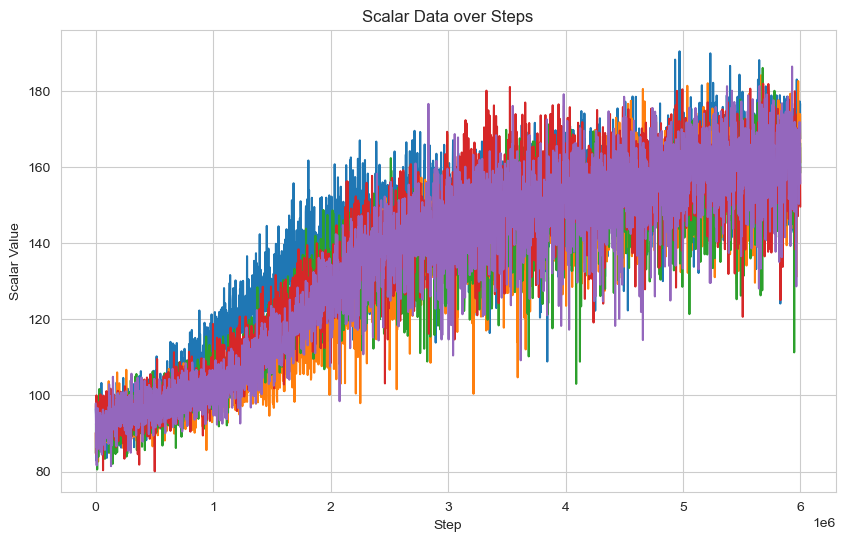

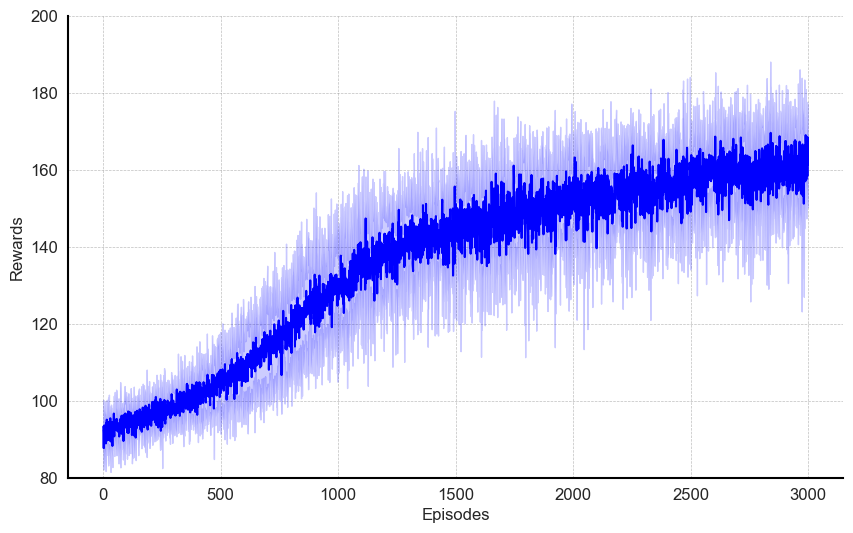

In [6]:
plt.figure(figsize=(10, 6))


for i in reg_happo_dict.keys():
    plt.plot(reg_happo_dict[i]['step'], reg_happo_dict[i]['value'], linestyle='-')
plt.title('Scalar Data over Steps')
plt.xlabel('Step')
plt.ylabel('Scalar Value')
# plt.ylim(0, 300)

plt.show()

avg_reg_happo, conf_reg_happo = average_and_confidence(reg_happo_data)
plot_with_confidence_interval(avg_reg_happo, conf_reg_happo, np.arange(avg_reg_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[80, 200], legend = False, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

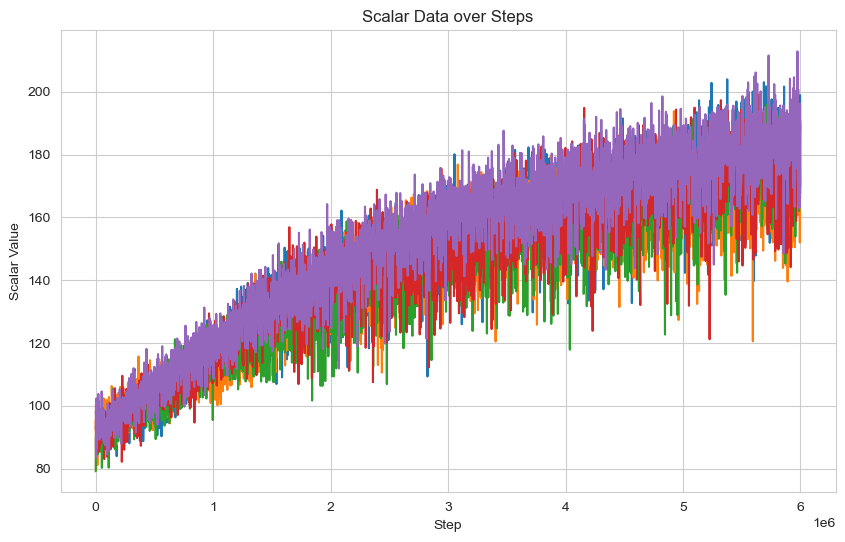

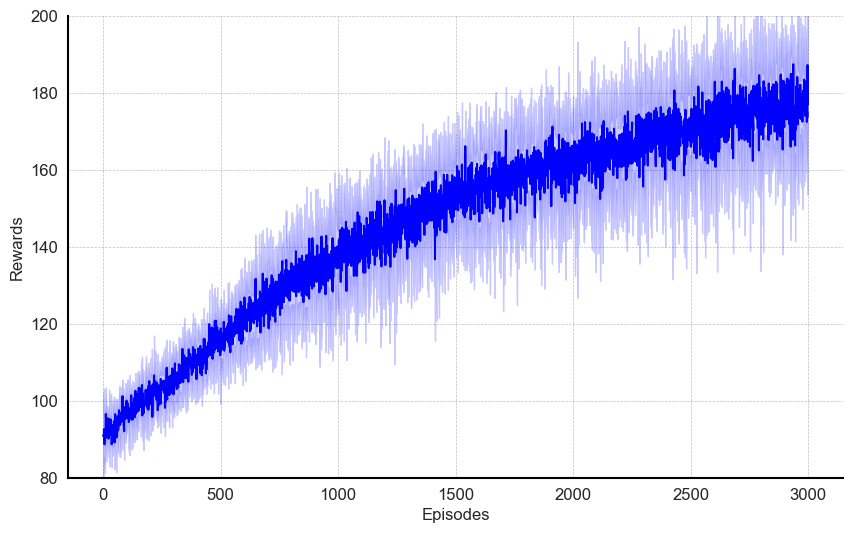

In [7]:
plt.figure(figsize=(10, 6))
for i in reg_hatrpo_dict.keys():
    plt.plot(reg_hatrpo_dict[i]['step'], reg_hatrpo_dict[i]['value'], linestyle='-')
plt.title('Scalar Data over Steps')
plt.xlabel('Step')
plt.ylabel('Scalar Value')
# plt.ylim(0, 300)
plt.show()

avg_reg_hatrpo, conf_reg_hatrpo = average_and_confidence(reg_hatrpo_data)
plot_with_confidence_interval(avg_reg_hatrpo, conf_reg_hatrpo, np.arange(avg_reg_hatrpo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[80, 200], legend = False, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))


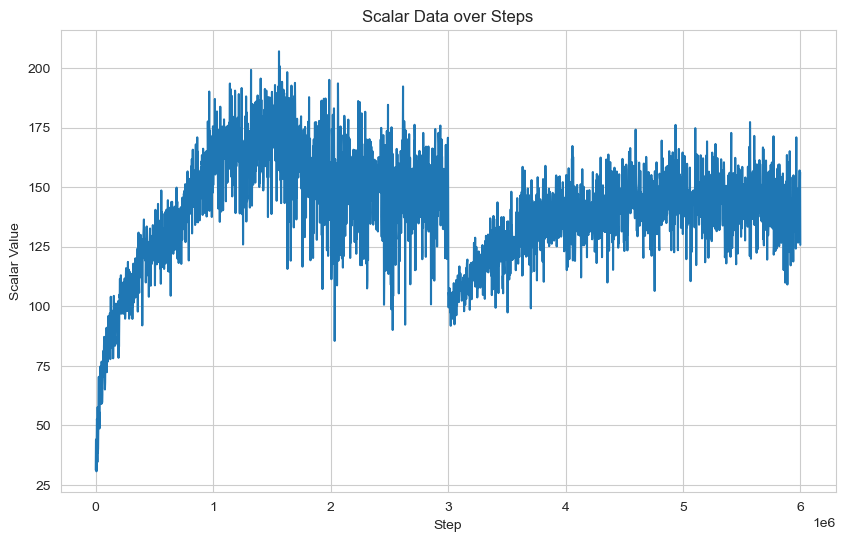

/Users/Hunter/opt/anaconda3/envs/MaMJC-maddpg/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hunter/opt/anaconda3/envs/MaMJC-maddpg/lib/python3.9/site-packages/numpy/core/_methods.py:258: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


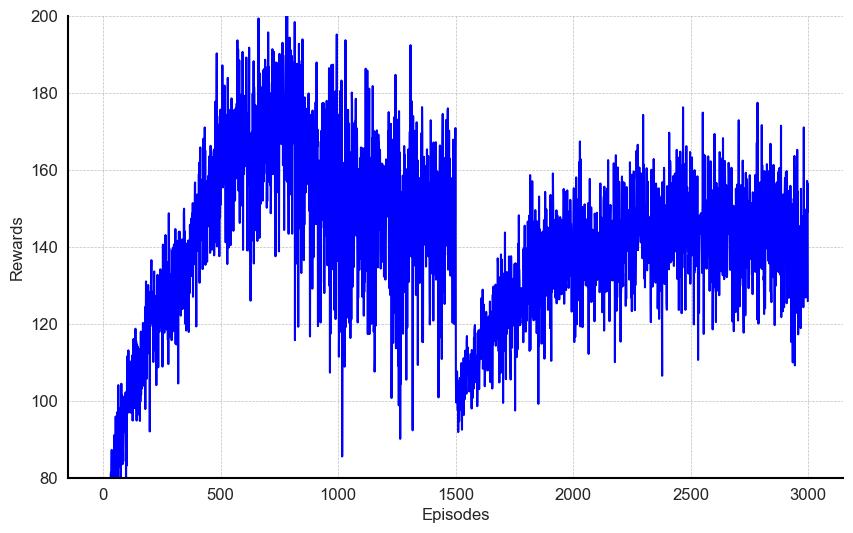

In [8]:
plt.figure(figsize=(10, 6))
for i in mal_0_hatrpo_dict.keys():
    plt.plot(mal_0_hatrpo_dict[i]['step'], mal_0_hatrpo_dict[i]['value'], linestyle='-')
plt.title('Scalar Data over Steps')
plt.xlabel('Step')
plt.ylabel('Scalar Value')
# plt.ylim(0, 300)
plt.show()

avg_mal_0_hatrpo, conf_mal_0_hatrpo = average_and_confidence(mal_0_hatrpo_data)
plot_with_confidence_interval(avg_mal_0_hatrpo, conf_mal_0_hatrpo, np.arange(avg_mal_0_hatrpo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[80, 200], legend = False, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

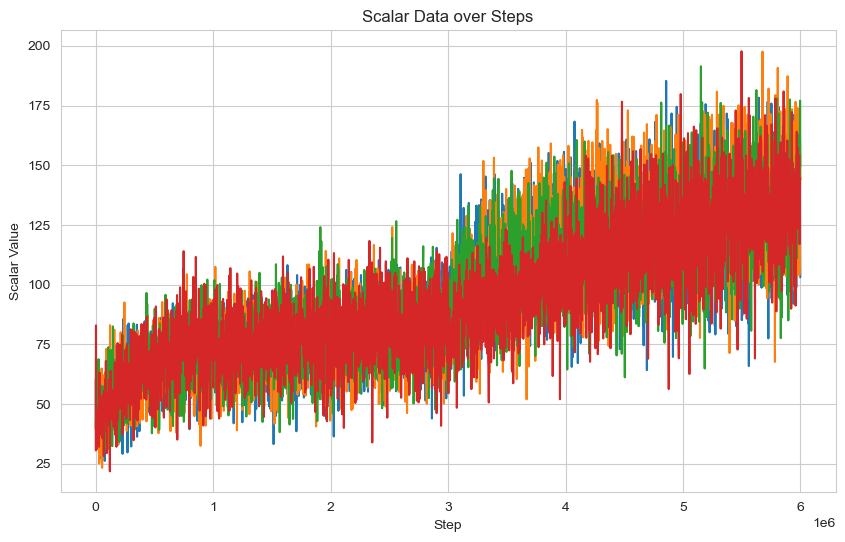

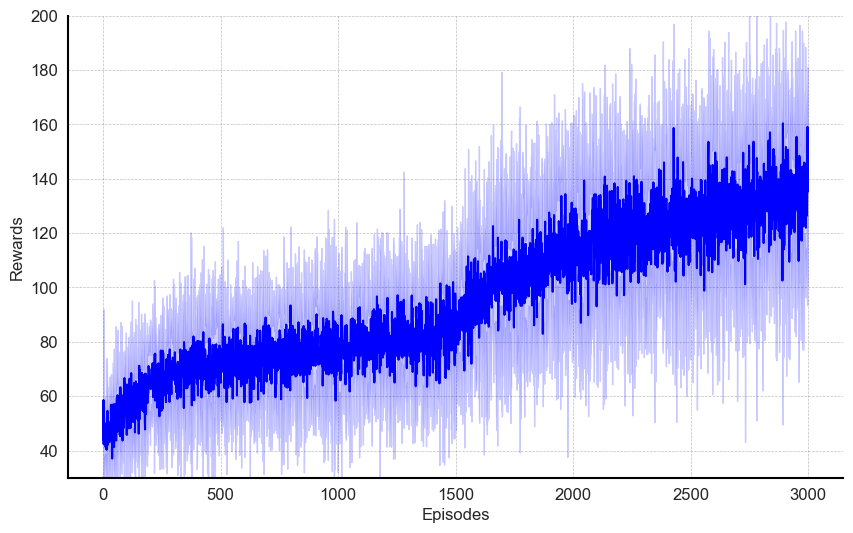

In [9]:
plt.figure(figsize=(10, 6))
for i in mal_0_happo_dict.keys():
    plt.plot(mal_0_happo_dict[i]['step'], mal_0_happo_dict[i]['value'], linestyle='-')
plt.title('Scalar Data over Steps')
plt.xlabel('Step')
plt.ylabel('Scalar Value')
# plt.ylim(0, 300)
plt.show()

avg_mal_0_happo, conf_mal_0_happo = average_and_confidence(mal_0_happo_data)
plot_with_confidence_interval(avg_mal_0_happo, conf_mal_0_happo, np.arange(avg_mal_0_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[30, 200], legend = False, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

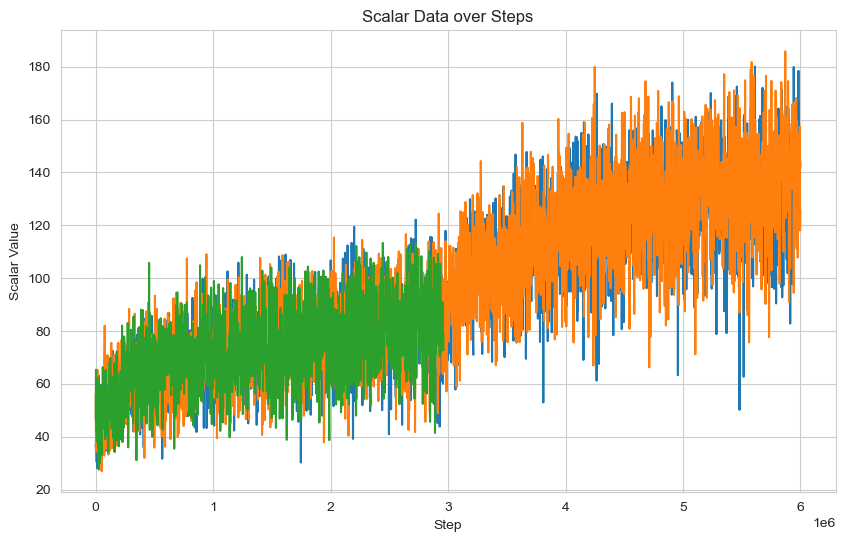

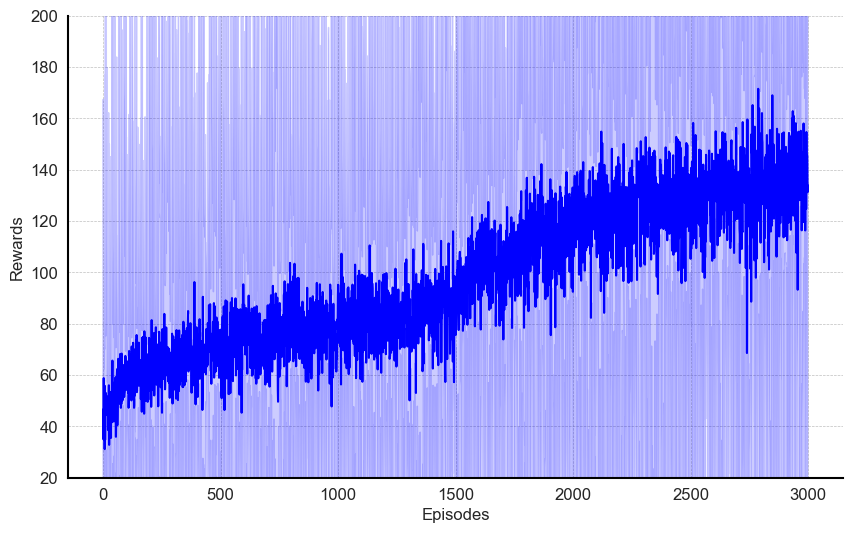

In [15]:
plt.figure(figsize=(10, 6))
for i in mal_2_happo_dict.keys():
    plt.plot(mal_2_happo_dict[i]['step'], mal_2_happo_dict[i]['value'], linestyle='-')
plt.title('Scalar Data over Steps')
plt.xlabel('Step')
plt.ylabel('Scalar Value')
# plt.ylim(0, 300)
plt.show()

avg_mal_2_happo, conf_mal_2_happo = average_and_confidence(mal_2_happo_data[:2])
plot_with_confidence_interval(avg_mal_2_happo, conf_mal_2_happo, np.arange(avg_mal_2_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], legend = False, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

In [20]:

len(mal_2_hatrpo_data)

2

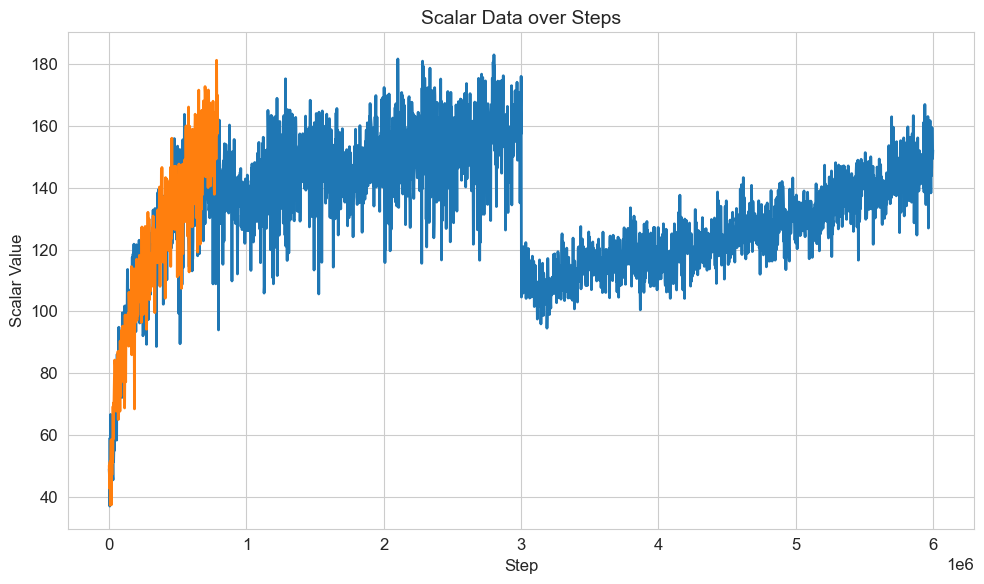

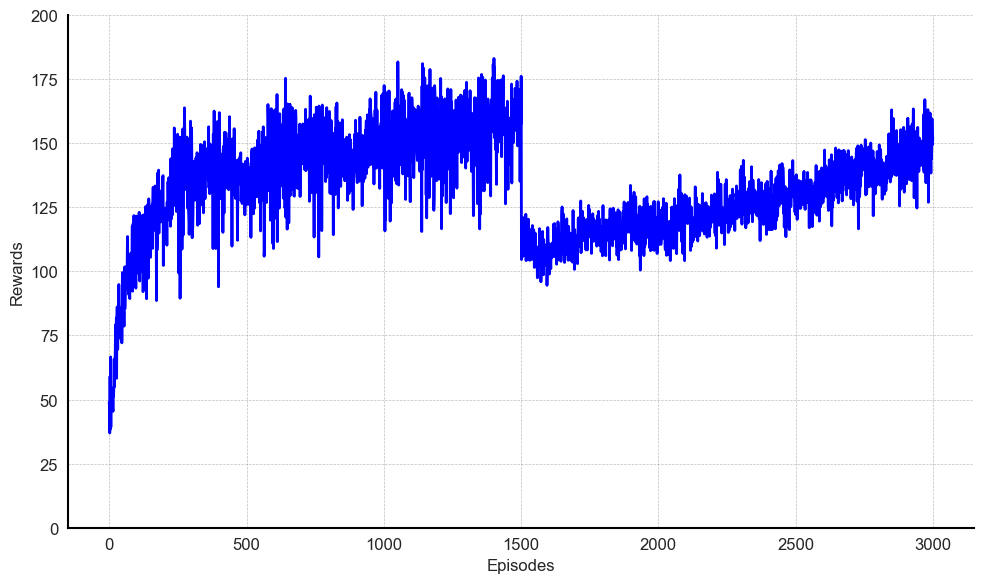

In [28]:
plt.figure(figsize=(10, 6))
for i in mal_2_hatrpo_dict.keys():
    plt.plot(mal_2_hatrpo_dict[i]['step'], mal_2_hatrpo_dict[i]['value'], linestyle='-')
plt.title('Scalar Data over Steps')
plt.xlabel('Step')
plt.ylabel('Scalar Value')
# plt.ylim(0, 300)
plt.show()

avg_mal_2_hatrpo, conf_mal_2_hatrpo = average_and_confidence([mal_2_hatrpo_data[0], mal_2_hatrpo_data[0]])
plot_with_confidence_interval(avg_mal_2_hatrpo, conf_mal_2_hatrpo, np.arange(avg_mal_2_hatrpo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[0, 200], legend = False, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

In [24]:
print(conf_mal_2_happo)

[120.83765794   0.83553145  36.5274304  ... 189.26546886 168.30801538
 104.385303  ]


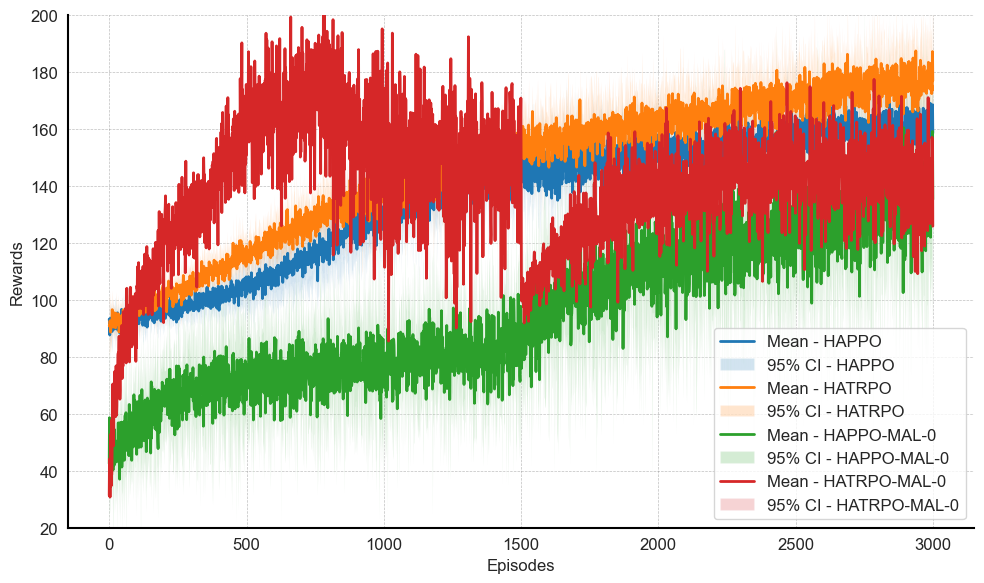

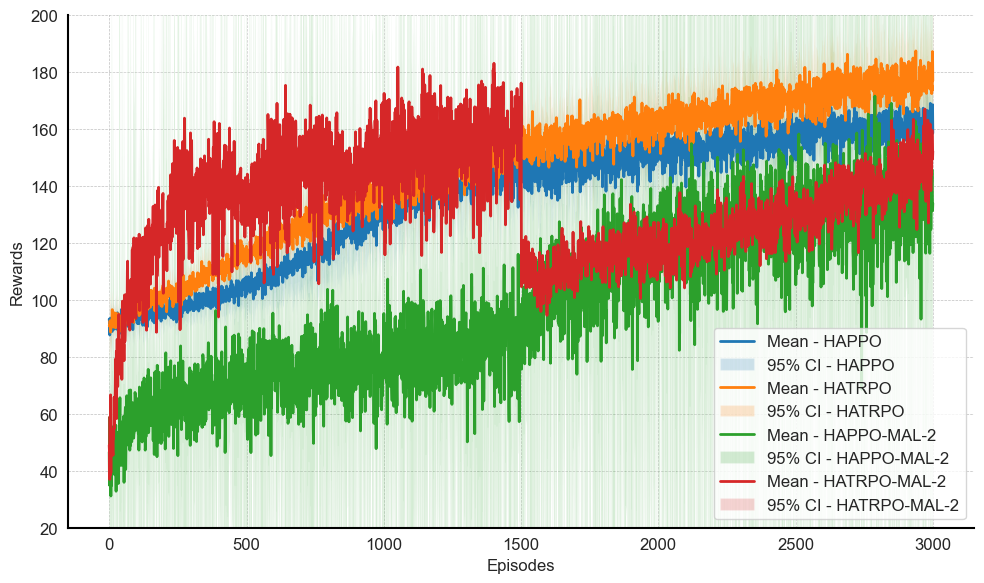

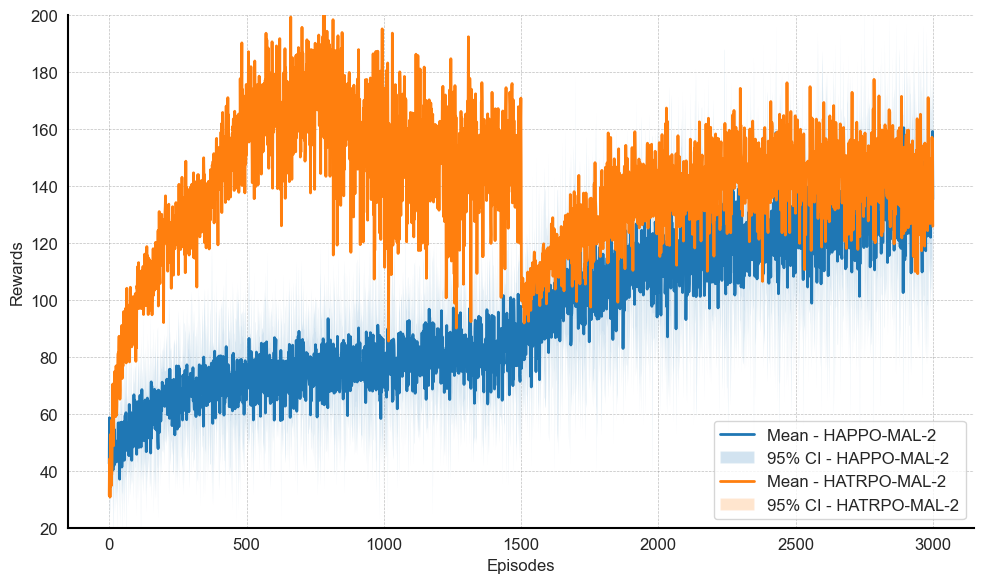

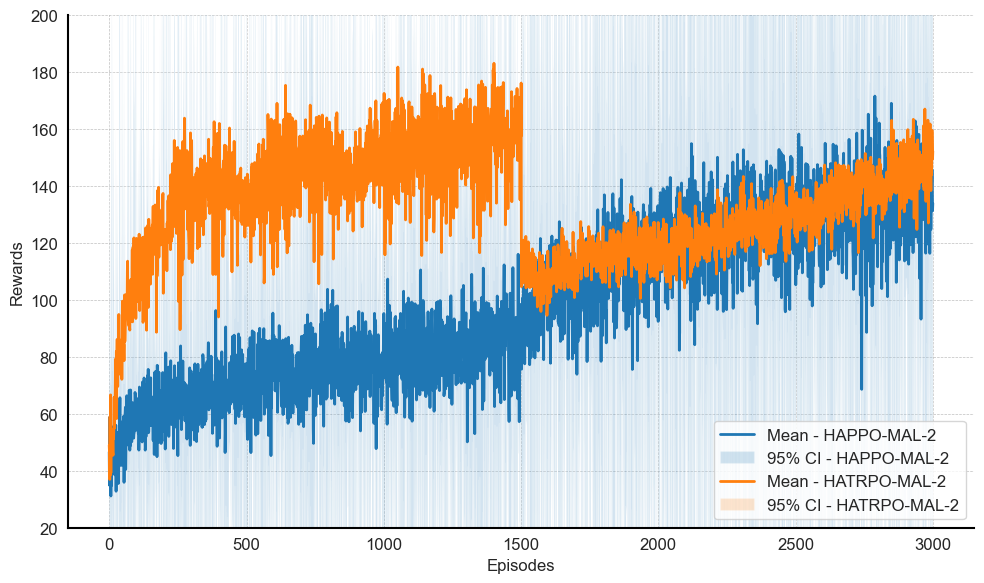

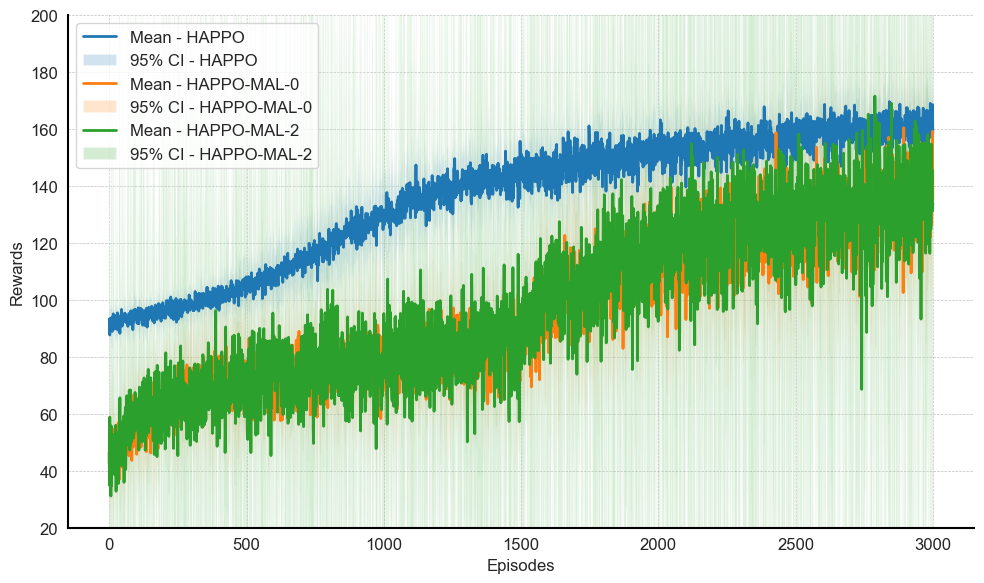

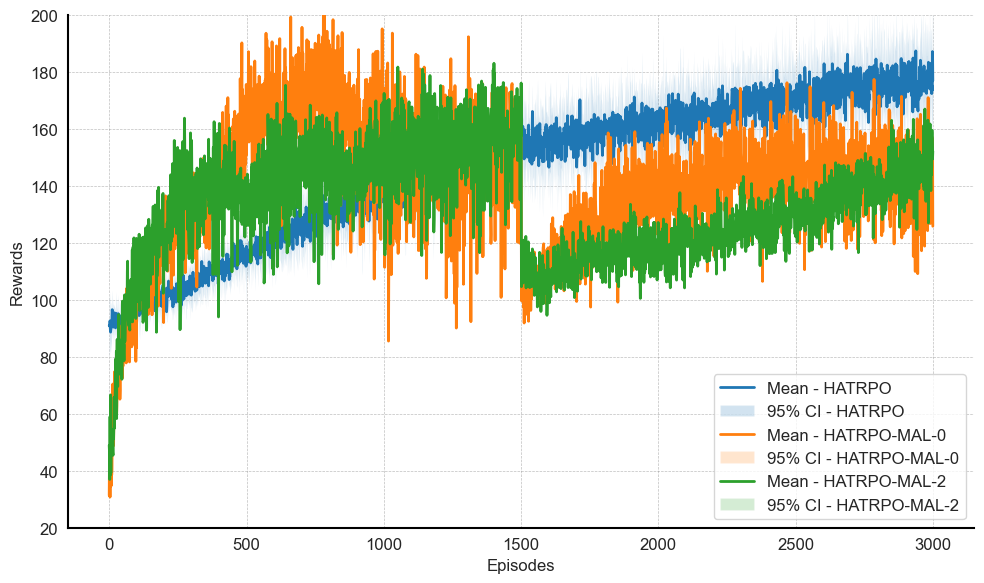

In [33]:
plot_multiple_with_confidence_intervals([avg_reg_happo, avg_reg_hatrpo, avg_mal_0_happo, avg_mal_0_hatrpo],[conf_reg_happo, conf_reg_hatrpo, conf_mal_0_happo, conf_mal_0_hatrpo], np.arange(avg_reg_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], labels = ['HAPPO', 'HATRPO', 'HAPPO-MAL-0', 'HATRPO-MAL-0'],legend=True, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))


plot_multiple_with_confidence_intervals([avg_reg_happo, avg_reg_hatrpo, avg_mal_2_happo, avg_mal_2_hatrpo],[conf_reg_happo, conf_reg_hatrpo, conf_mal_2_happo, conf_mal_2_hatrpo], np.arange(avg_reg_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], labels = ['HAPPO', 'HATRPO', 'HAPPO-MAL-2', 'HATRPO-MAL-2'],legend=True, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))


plot_multiple_with_confidence_intervals([avg_mal_0_happo, avg_mal_0_hatrpo],[conf_mal_0_happo, conf_mal_0_hatrpo], np.arange(avg_mal_0_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], labels = ['HAPPO-MAL-2', 'HATRPO-MAL-2'],legend=True, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

plot_multiple_with_confidence_intervals([avg_mal_2_happo, avg_mal_2_hatrpo],[conf_mal_2_happo, conf_mal_2_hatrpo], np.arange(avg_mal_2_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], labels = ['HAPPO-MAL-2', 'HATRPO-MAL-2'],legend=True, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

# plot_multiple_with_confidence_intervals([avg_reg_happo, avg_mal_0_happo, avg_mal_2_happo],[conf_reg_happo, conf_mal_0_happo, conf_mal_2_happo], np.arange(avg_reg_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], labels = ['HAPPO', 'HATRPO', 'HAPPO-MAL-0', 'HATRPO-MAL-0'],legend=True, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

plot_multiple_with_confidence_intervals([avg_reg_happo, avg_mal_0_happo, avg_mal_2_happo],[conf_reg_happo, conf_mal_0_happo, conf_mal_2_happo], np.arange(avg_reg_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], labels = ['HAPPO', 'HAPPO-MAL-0', 'HAPPO-MAL-2'],legend=True, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

plot_multiple_with_confidence_intervals([avg_reg_hatrpo, avg_mal_0_hatrpo, avg_mal_2_hatrpo],[conf_reg_hatrpo, conf_mal_0_hatrpo, conf_mal_2_hatrpo], np.arange(avg_reg_happo.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[20, 200], labels = ['HATRPO', 'HATRPO-MAL-0', 'HATRPO-MAL-2'],legend=True, show_title=False, smoothing_factor=0.000000001, fig_size=(10, 6))

In [11]:
all_data = [reg_happo_data, reg_hatrpo_data, mal_0_happo_data, mal_0_hatrpo_data, mal_2_happo_data, mal_2_hatrpo_data]
for k,i in enumerate(all_data):
    print(f"{k} : {len(i)}")
    for j in i:
        print(j.shape) 

0 : 5
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
1 : 5
(3000,)
(3000,)
(3000,)
(3000,)
(3000,)
2 : 4
(3000,)
(3000,)
(3000,)
(3000,)
3 : 1
(3000,)
4 : 3
(3000,)
(3000,)
(1481,)
5 : 2
(3000,)
(396,)


In [12]:
reg_happo_avg, reg_happo_conf = average_and_confidence(reg_happo_data)  
reg_hatrpo_avg, reg_hatrpo_conf = average_and_confidence(reg_hatrpo_data)
mal_0_happo_avg, mal_0_happo_conf = average_and_confidence(mal_0_happo_data)
# mal_0_hatrpo_avg, mal_0_hatrpo_conf = average_and_confidence(mal_0_hatrpo_data)
# mal_2_happo_avg, mal_2_happo_conf = average_and_confidence(mal_2_happo_data)
mal_2_hatrpo_avg, mal_2_hatrpo_conf = average_and_confidence(mal_2_hatrpo_data)



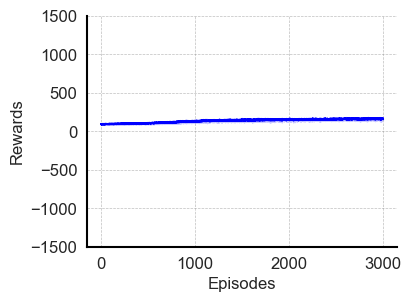

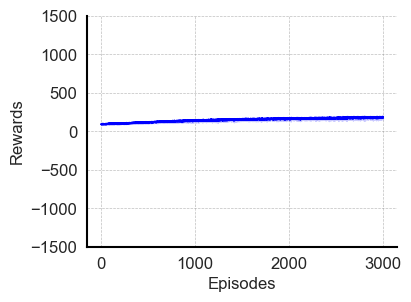

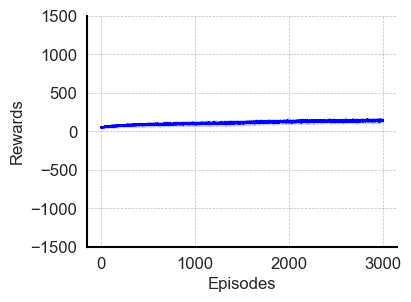

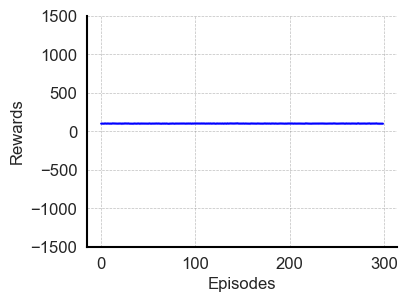

In [13]:
plot_with_confidence_interval(reg_happo_avg, reg_happo_conf, np.arange(reg_happo_avg.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[-1500, 1500], legend = False, show_title=False, smoothing_factor=0.000000001)
plot_with_confidence_interval(reg_hatrpo_avg, reg_hatrpo_conf, np.arange(reg_hatrpo_avg.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[-1500, 1500], legend = False, show_title=False, smoothing_factor=0.000000001)
plot_with_confidence_interval(mal_0_happo_avg, mal_0_happo_conf, np.arange(mal_0_happo_avg.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[-1500, 1500], legend = False, show_title=False, smoothing_factor=0.000000001)
# plot_with_confidence_interval(mal_0_hatrpo_avg, mal_0_hatrpo_conf, np.arange(mal_0_hatrpo_avg.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[-1500, 1500], legend = False, show_title=False, smoothing_factor=0.000000001)
# plot_with_confidence_interval(mal_2_happo_avg, mal_2_happo_conf, np.arange(mal_2_happo_avg.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[-1500, 1500], legend = False, show_title=False, smoothing_factor=0.000000001)
plot_with_confidence_interval(mal_2_hatrpo_avg, mal_2_hatrpo_conf, np.arange(mal_2_hatrpo_avg.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[-1500, 1500], legend = False, show_title=False, smoothing_factor=0.000000001)


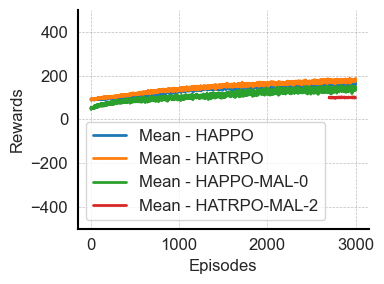

In [16]:
plot_multiple([reg_happo_avg, reg_hatrpo_avg, mal_0_happo_avg, mal_2_hatrpo_avg], np.arange(reg_happo_avg.shape[0]), xlabel='Episodes', ylabel='Rewards', save=True, title='', ylim=[-500, 500], labels = ['HAPPO', 'HATRPO', 'HAPPO-MAL-0', 'HATRPO-MAL-2'],legend=True, show_title=False, smoothing_factor=0.000000001)